# All Imports required to run program

In this cell, all the packages that are required for the analysis of the dataset are mentioned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from IPython.display import display, Math


# Importing DataSet 

In this section, we have imported the dataset in our notebook

In [2]:
dataset = pd.read_csv('../data.csv')
dataset.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,01/05/1920,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,01/01/1920,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,10/01/1920,0.0768,122.076,0.2990,1920


In [3]:
# description of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

# Cleaning

This section of notebook represents the cleaning process.

<ul>
    <li>Selecting attributes that are required to make model for analysis</li>
    <li>Once attributes have been selected, null value check is done </li>
    <li>After null check, duplicacy check is done</li> 
    <li>Lastly, all the numerical values are formatted till 3 decimal places</li>
</ul>


### Attributes Selection

After going through the columns and observing them, it is noted that columns mentioned below are not required for our model as they hold no relevance while undersatnding the popularity score.

<ol>
    <li>
        <b>id</b> - a unique identifier for each song, therefore will be removed
    </li>
    <li>
        <b>name</b> - a categorical variable, in our opinion would not be useful for our model
    </li>
    <li>
        <b>release_date</b> - as we already have year as one attribute, therefore we can get the idea of popularity pattern yearwise using that column.
    </li>
    <li>
        <b>artists</b> - In our perspective, this attribute is object, categorical and can create problem for our model during analysis but on the other hand we also believe that artist do hold an important parameter while understanding a song popularity. Therefore, for now we will drop this column but later on we will make some dummy values and try to put this attribute back in our feature. 
    </li>
</ol>

In [4]:
dataset = dataset.drop(labels=['id', 'name', 'release_date'], axis=1)
dataset.shape

(174389, 16)

### Null Value Check

In [5]:
dataset.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

### Duplicate Value Check

In [6]:
# counting number of duplicate values
dataset.duplicated().sum()

3452

In [7]:
# removing duplicate value from data
dataset = dataset[~dataset.duplicated()==1]
dataset.shape

(170937, 16)

#### Converting milisecond unit if track duration to minutes
for better understanding

In [8]:
dataset['duration_min'] = dataset['duration_ms']/60000
dataset = dataset.drop(['duration_ms'], axis=1)
coloumns = ['acousticness','artists','danceability','duration_min','energy','explicit','instrumentalness','key','liveness',
            'loudness','mode','popularity','speechiness','tempo','valence','year']
dataset=dataset[coloumns]

In [9]:
dataset.head()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,2.805550,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,2.503333,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,2.730450,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,7.034783,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,2.753733,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920


### Formatiing all the numerical values to 3 decimal places

In [10]:
dataset.round(3)

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,2.806,0.224,0,0.001,5,0.379,-12.628,0,12,0.094,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,2.503,0.517,0,0.026,5,0.081,-7.261,0,7,0.053,86.889,0.950,1920
2,0.993,['Mamie Smith'],0.647,2.730,0.186,0,0.000,0,0.519,-12.098,1,4,0.174,97.600,0.689,1920
3,0.000,['Oscar Velazquez'],0.730,7.035,0.798,0,0.801,2,0.128,-7.311,1,17,0.042,127.997,0.042,1920
4,0.295,['Mixe'],0.704,2.754,0.707,1,0.000,10,0.402,-6.036,0,2,0.077,122.076,0.299,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174369,0.995,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.297,5.820,0.029,0,0.908,8,0.100,-30.008,1,0,0.056,141.636,0.068,2021
174371,0.995,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.343,3.445,0.016,0,0.878,9,0.077,-30.915,0,0,0.046,126.970,0.151,2021
174375,0.988,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.316,5.056,0.057,0,0.879,3,0.120,-24.121,1,0,0.052,81.070,0.037,2021
174377,0.795,['Alessia Cara'],0.429,2.412,0.211,0,0.000,4,0.196,-11.665,1,0,0.036,94.710,0.228,2021


# Data Analysis

#### In this part of report we will analyse and try to find certain questions

<ol>
    <li> What type of data are we dealing with? </li>
    <li> What is the relation between individual attributes with popularity of song? </li>
</ol>


<p style="font-size:13px">
    As we have removed not required coloumns like song name, id and release_date. Therefore we get a 15 numrical columns and 1 string columns
    </p>

In [11]:
# identfying type of data columns we have
numerical_column = dataset.columns[dataset.dtypes != 'object']
String_column = dataset.columns[dataset.dtypes == 'object']
print("numerical columns - " + str(len(numerical_column)) + " " + "non numerical column - "+ 
      str(len(String_column)))

numerical columns - 15 non numerical column - 1


<i>
    creating a heatmap to check for the numerical column correlation. This can help to better understand attributes in a graphical way
   </i>

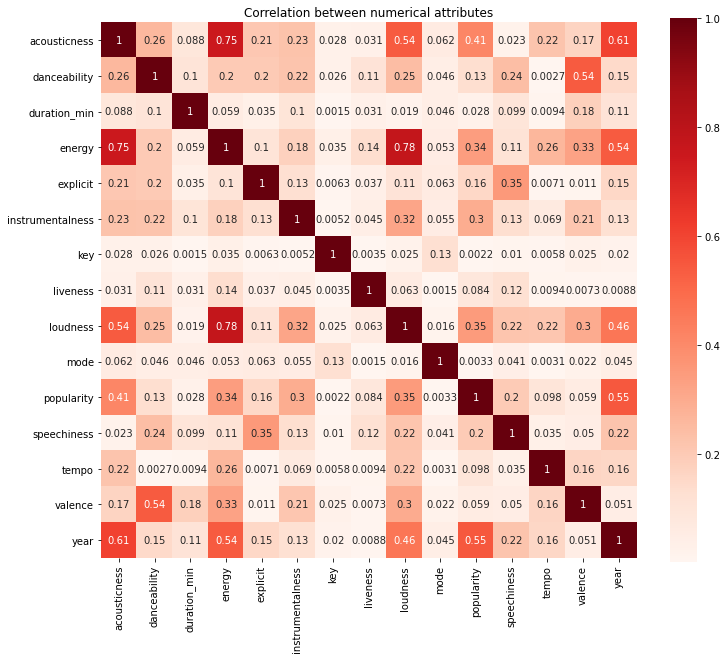

In [12]:
numeric_dataframe = pd.DataFrame(data=dataset, columns=numerical_column, index=dataset.index)
corr = np.abs(numeric_dataframe.corr())
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.color_palette("rocket")
sns.heatmap(corr, cmap=plt.cm.Reds, square=True, annot=True)
plt.title('Correlation between numerical attributes')
plt.show()

<i>
    After the graphical representation lets look for attributes that display a strong correlation with popularity
</i>

In [13]:
correlation_list = np.abs(corr['popularity']).sort_values(ascending=False)
print('strong linear correlated attributes to POPULARITY are:')
for i, row in enumerate(correlation_list):
   if 0.2 <= row < 0.9:
      print(f'{correlation_list.index[i]:17} --> {row: .2f} (abs)')

strong linear correlated attributes to POPULARITY are:
year              -->  0.55 (abs)
acousticness      -->  0.41 (abs)
loudness          -->  0.35 (abs)
energy            -->  0.34 (abs)
instrumentalness  -->  0.30 (abs)
speechiness       -->  0.20 (abs)


<i>
    In order to better understand each attribute relation with each other. We can create a scatter plot using pairplot.
</i>

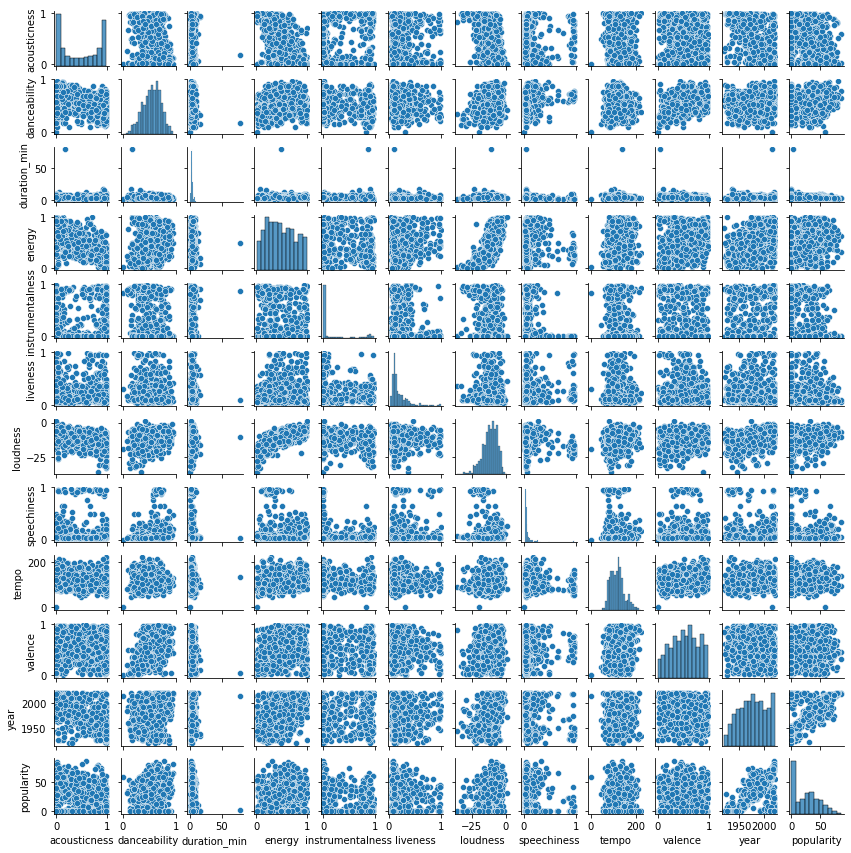

In [14]:
# due to long running time of pair plot, a sample of 1000 records is taken
# as key, explicit and mode are categorical value, so we can remove from the pairplot
plot = sns.pairplot(dataset.sample(1000), 
                    height = 1, 
                    vars =['acousticness', 'danceability', 'duration_min','energy', 'instrumentalness', 'liveness', 
                           'loudness', 'speechiness', 'tempo', 'valence', 'year', 'popularity'])
plt.show()

### Categorical Data

<p> 
    Let dig deeper to understand individual attribute relation wih popularity attribute.
<p>

#### 1. Explicit

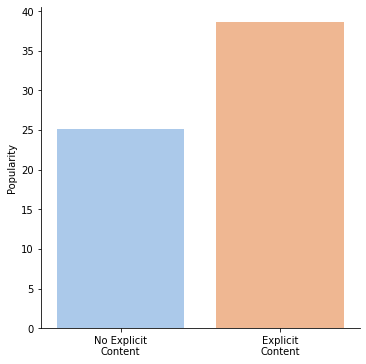

In [15]:
# Explicit attribute defines if any song has eplicit content or not. In dataset it is encoded as 0--> No and 1 --> Yes.
explicit_plot = sns.catplot(x="explicit",
                            y = "popularity", 
                            kind="bar",
                            palette="pastel", 
                            data=dataset[['explicit','popularity']], ci=None
                           )
explicit_plot.set_axis_labels("", "Popularity")
explicit_plot.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

#### 2. Key

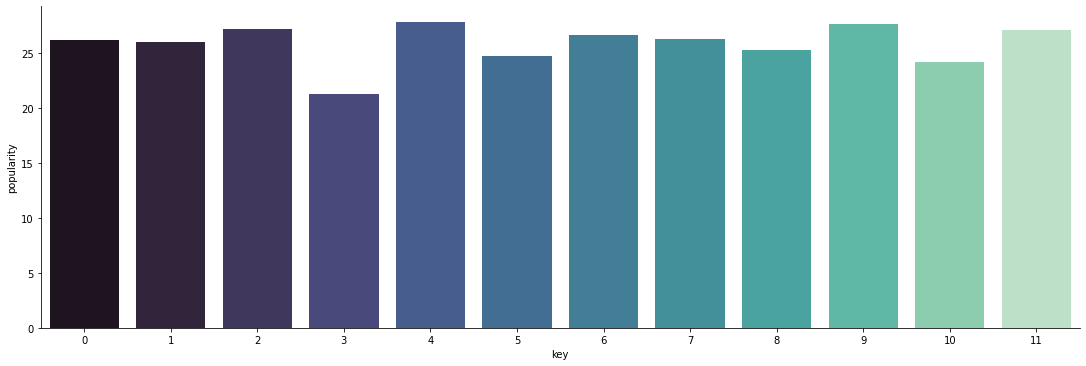

In [16]:
# key attribute define the key the track is made in. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
sns.catplot(x="key", 
            y = "popularity", 
            kind="bar", 
            palette="mako",
            aspect = 3,
            data=dataset[['key','popularity']], ci=None
           )

#### 3. Mode

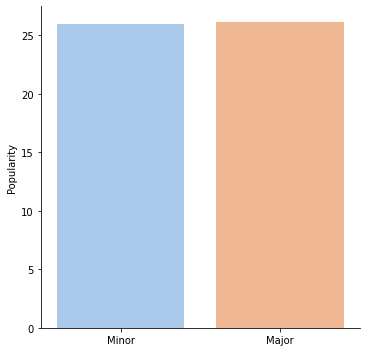

In [17]:
# Mode attribute in dataset explains the modality (major or minor) of a track. Major --> 1 and minor --> 0.
mode_plot = sns.catplot(x="mode", 
            y = "popularity", 
            kind="bar", 
            palette="pastel",
            data=dataset[['mode','popularity']],
            ci=None
           )
mode_plot.set_axis_labels("", "Popularity")
mode_plot.set_xticklabels(['Minor', 'Major'])
plt.show()

##### 4. Artist

In [18]:
dataset['artists'].nunique()

36195

<p>
    Grouping artist in datatset based on there popularity
</p>

In [19]:
top_performers = dataset.groupby('artists')['popularity'].sum().sort_values(ascending = False)
top_performers

artists
['The Beatles']                                                            19110
['Frank Sinatra']                                                          17434
['Elvis Presley']                                                          16998
['Fleetwood Mac']                                                          15927
['The Rolling Stones']                                                     15648
                                                                           ...  
['Stan Freeman']                                                               0
['Leadbelly with Sarah Garland']                                               0
['Eric Tyrell', 'Natasha Burnett', 'Tune Brothers']                            0
['Eric Tyrell', 'Denice Perlins', 'Etienne Corpse', 'Belina Fernandez']        0
['Fred Everything', 'Shur-I-Kan']                                              0
Name: popularity, Length: 36195, dtype: int64

### Numerical Data

<p> 
    Let dig deeper to understand individual attribute relation wih popularity attribute.Before that we will check probability distribution function (PDF) for each feature. The PDF will show us how that variable is distributed. The PDF is often the basis on which we decide whether we want to transform a feature
<p>

##### Probability Distribution Check for Each numerical Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

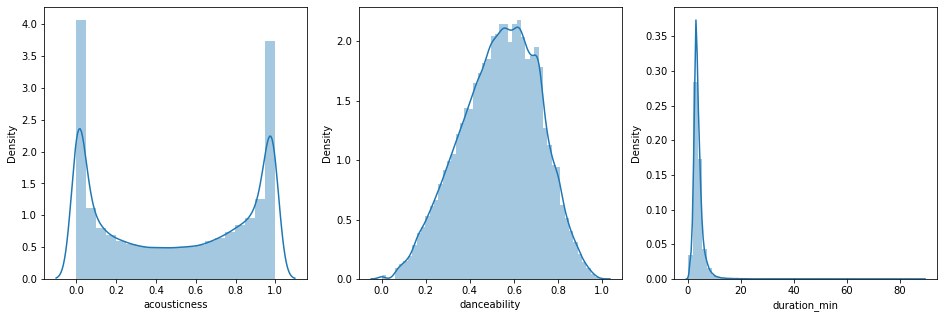

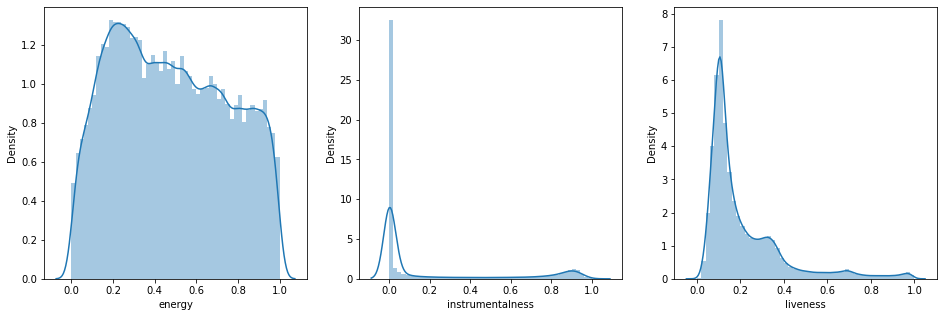

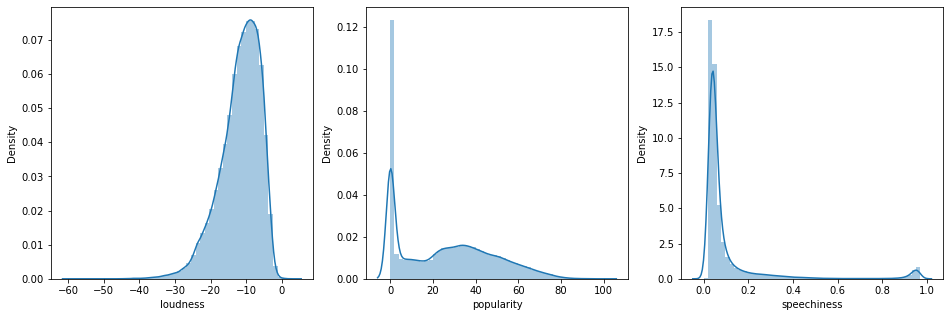

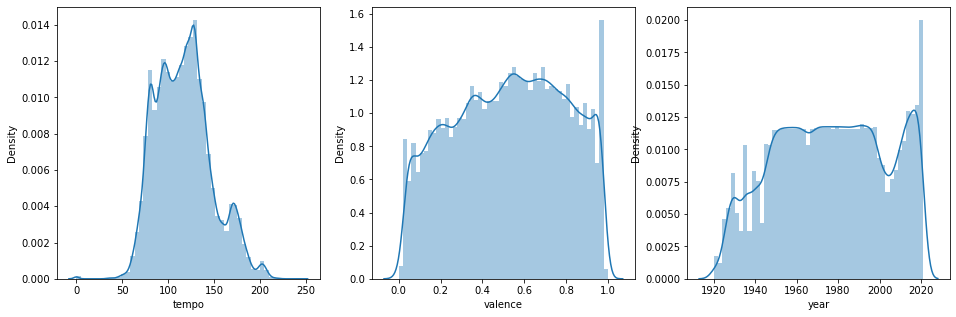

In [20]:
fig = plt.figure(figsize = (16,5)) 
ax1 = fig.add_subplot(1,3,1)
sns.distplot(dataset['acousticness'], bins = 20)
ax2 = fig.add_subplot(1,3,2)
sns.distplot(dataset['danceability'])
ax3 = fig.add_subplot(1,3,3)
sns.distplot(dataset['duration_min'])
fig = plt.figure(figsize = (16,5)) 
ax4 = fig.add_subplot(1,3,1)
sns.distplot(dataset['energy'])
ax5 = fig.add_subplot(1,3,2)
sns.distplot(dataset['instrumentalness'])
ax6 = fig.add_subplot(1,3,3)
sns.distplot(dataset['liveness'])
fig = plt.figure(figsize = (16,5)) 
ax7 = fig.add_subplot(1,3,1)
sns.distplot(dataset['loudness'])
ax8 = fig.add_subplot(1,3,2)
sns.distplot(dataset['popularity'])
ax9 = fig.add_subplot(1,3,3)
sns.distplot(dataset['speechiness'])
fig = plt.figure(figsize = (16,5)) 
ax10 = fig.add_subplot(1,3,1)
sns.distplot(dataset['tempo'])
ax11 = fig.add_subplot(1,3,2)
sns.distplot(dataset['valence'])
ax12 = fig.add_subplot(1,3,3)
sns.distplot(dataset['year'])
plt.show()

#### 1. Acousticness

In [21]:
dataset['acousticness'].describe()

count    170937.000000
mean          0.501842
std           0.378950
min           0.000000
25%           0.091600
50%           0.523000
75%           0.895000
max           0.996000
Name: acousticness, dtype: float64

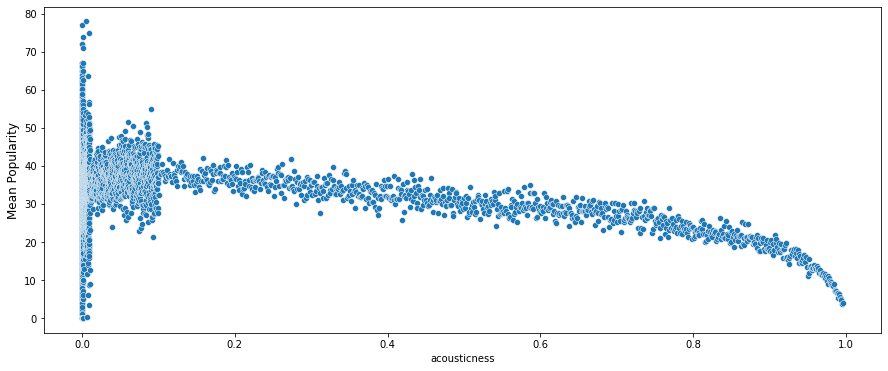

In [22]:
# understanding relation between accousitiness and popularity
#sns.scatterplot(data=dataset[['popularity', 'acousticness']], y="popularity", x="acousticness")
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['acousticness'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
#plt.tight_layout()
plt.show()

#### 2. Danceability

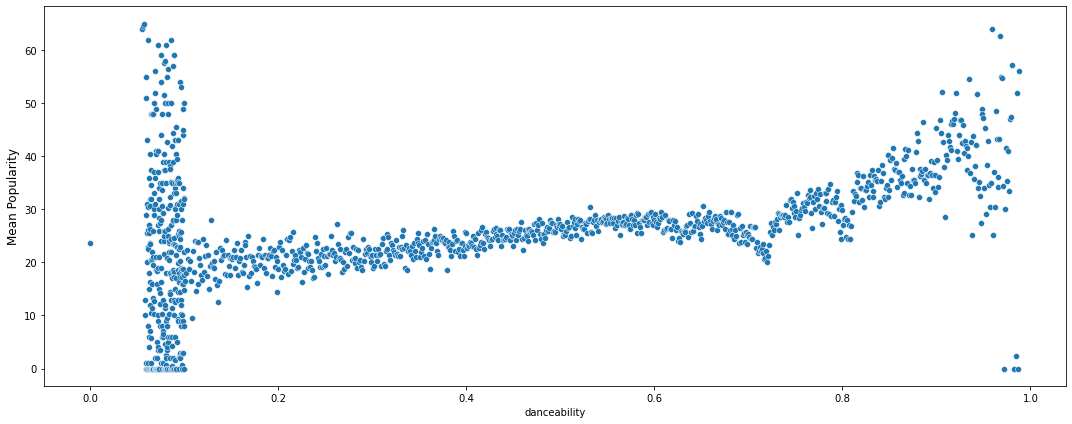

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('danceability')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['danceability'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 3. duration_min

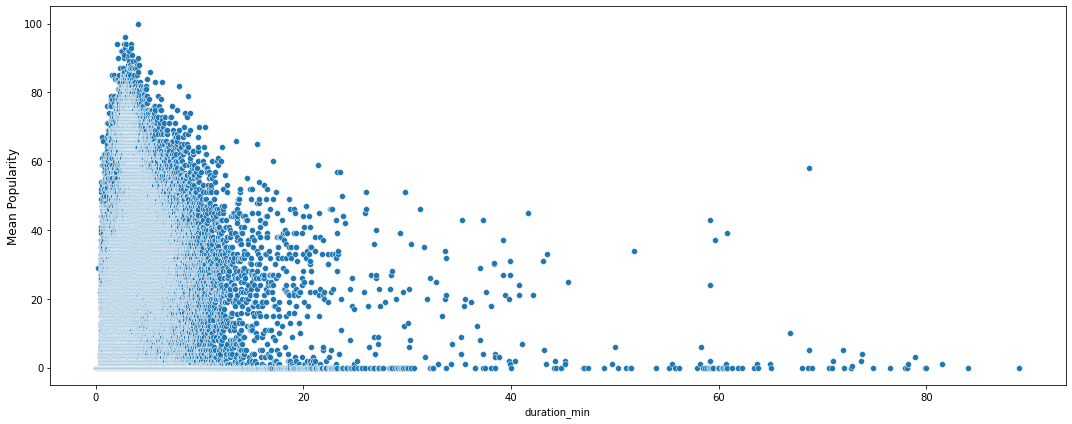

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('duration_min')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['duration_min'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 4. energy

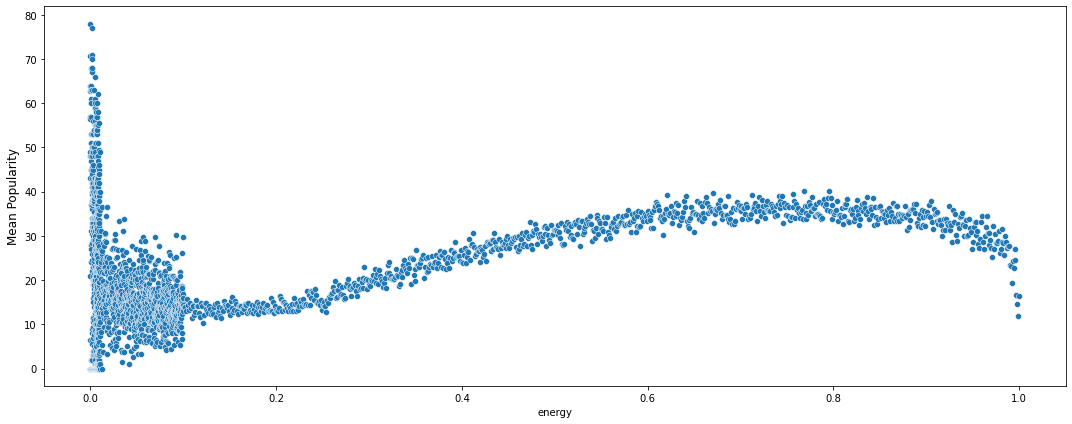

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['energy'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 5. instrumentalness

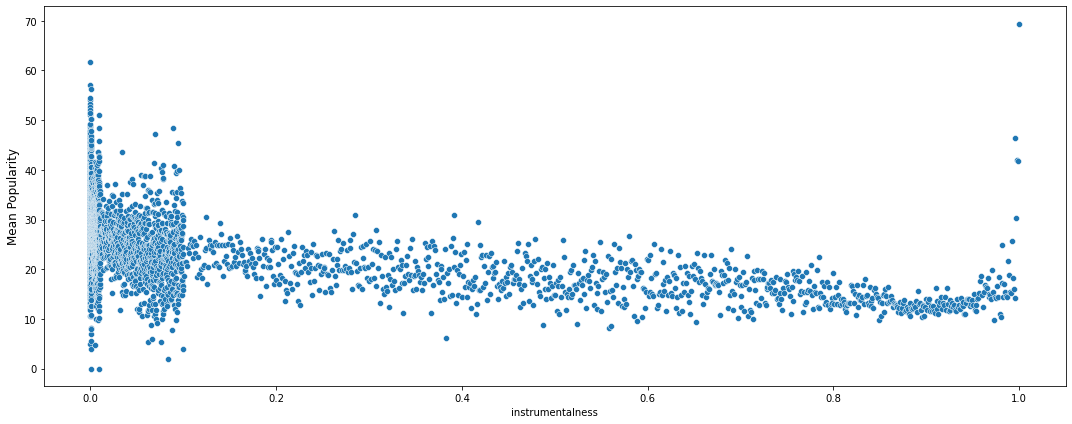

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['instrumentalness'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 6. liveness

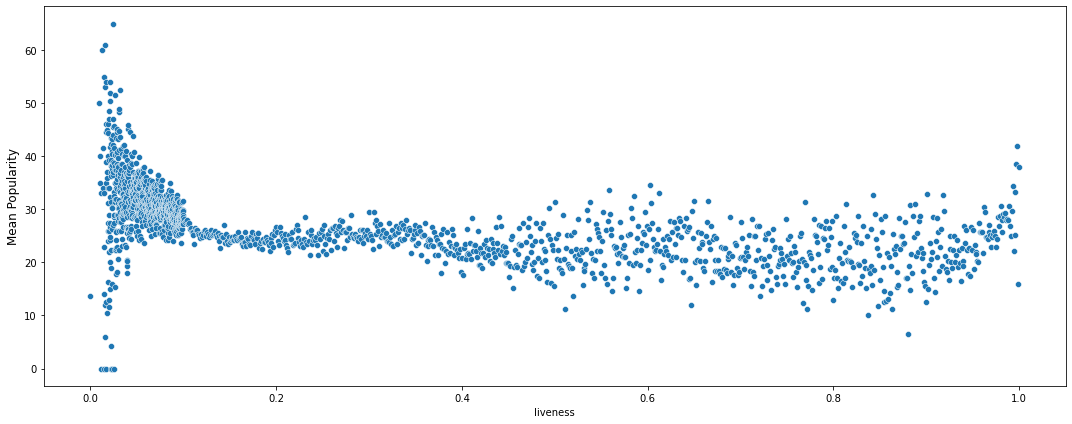

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('liveness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['liveness'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 7. loudness

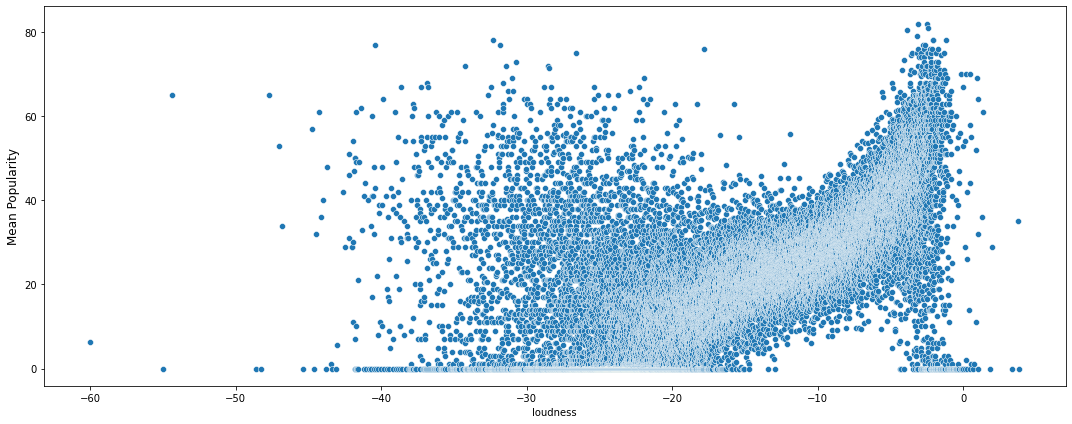

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('loudness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['loudness'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 8. speechiness

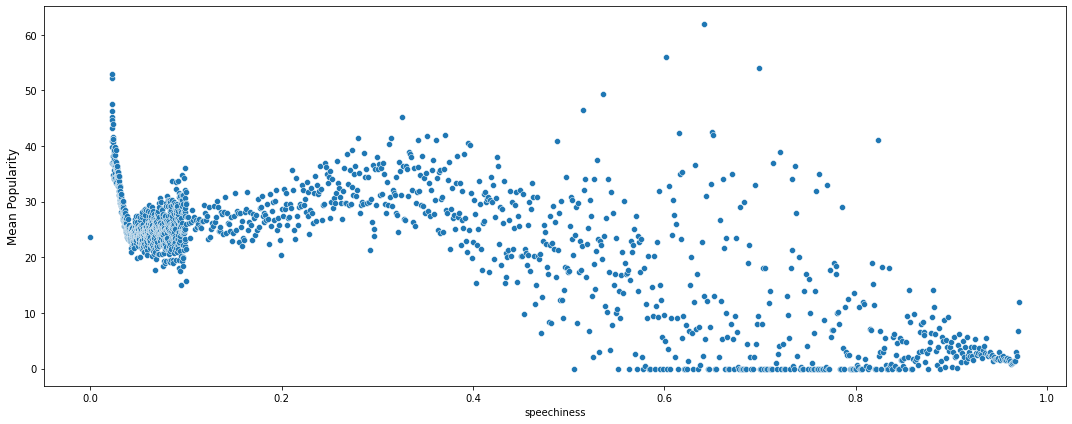

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['speechiness'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 9. tempo

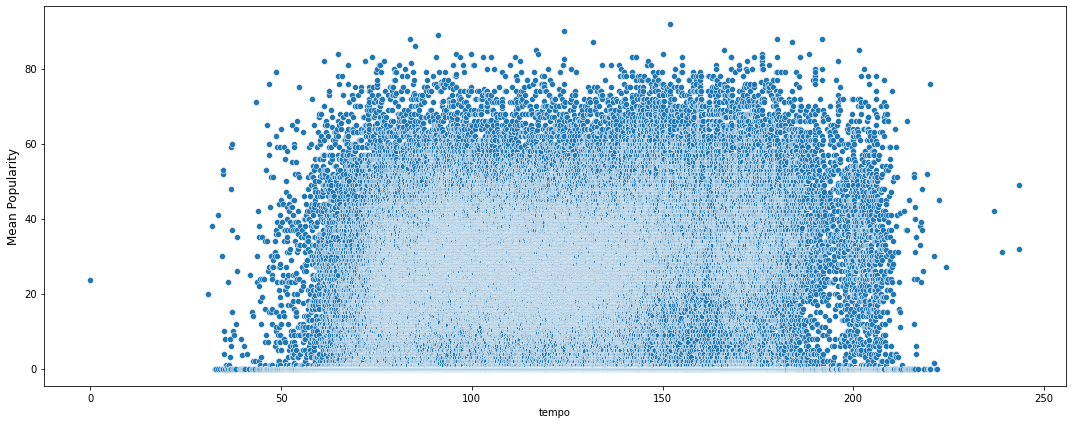

In [30]:
#sns.scatterplot(data=dataset[['popularity', 'tempo']], y="popularity", x="tempo")
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('tempo')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['tempo'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 10 valence

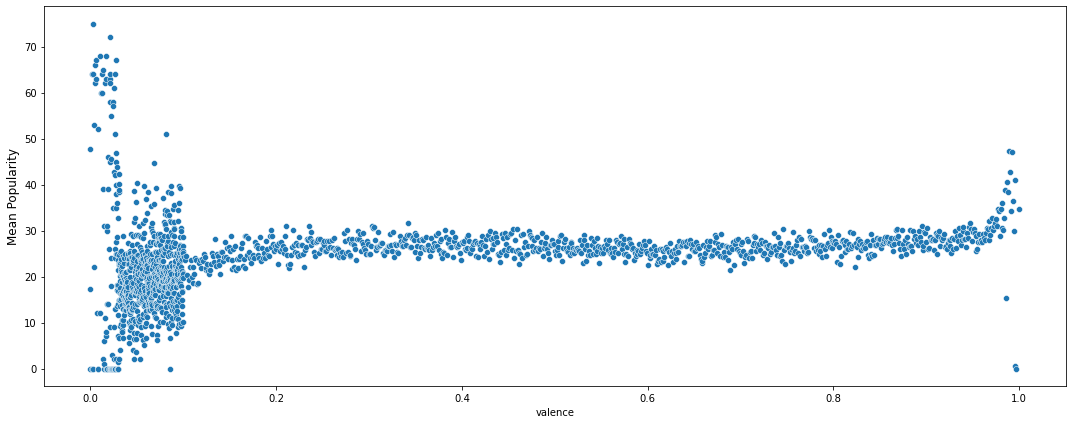

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
group_data =  dataset.groupby('valence')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = group_data['valence'], y = group_data['popularity'])
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

#### 11. year 

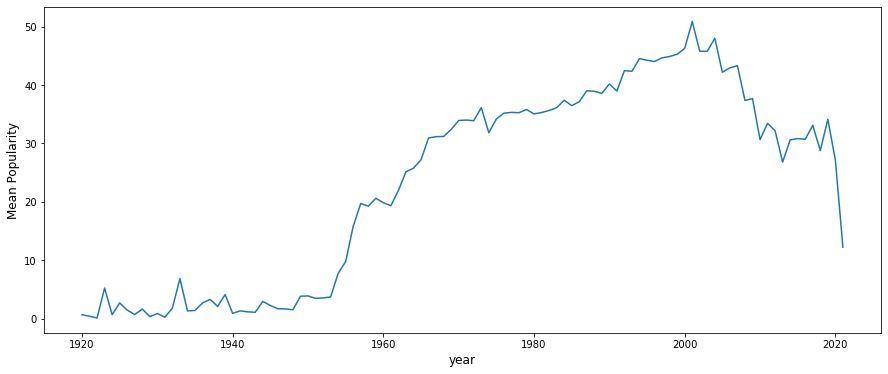

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
ax =  dataset.groupby('year')['popularity'].mean().plot()
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('year', fontsize = 12)
plt.show()

# Multi Colinearity Check

<p>
    Since we donot have any direct method check in sklearn. We will use statistical technique to understand if any of the 
    features have multicolinearity.
    In order to complete this task we will use variance inflation factors from statsmodel package.
</p>

In [33]:
variables= dataset.drop(['popularity', 'artists'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.226595,acousticness
1,18.682115,danceability
2,3.746058,duration_min
3,20.661459,energy
4,1.346379,explicit
5,1.689592,instrumentalness
6,3.245209,key
7,2.598394,liveness
8,16.747693,loudness
9,3.496314,mode


<p>
    As we can clearly see year has highest VIF. Therefore, we have to drop it.  
</p>

In [34]:
dataset_no_multicolinearity = dataset.drop(['year'],axis=1)
dataset_no_multicolinearity.head()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.991000,['Mamie Smith'],0.598,2.805550,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,2.503333,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500
2,0.993000,['Mamie Smith'],0.647,2.730450,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890
3,0.000173,['Oscar Velazquez'],0.730,7.034783,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422
4,0.295000,['Mixe'],0.704,2.753733,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990


# Pre-Processing

<p>
    After analyses of the Dataset, we found some feature needs transformation. This will be done in following order:
    <ol>
        <li>
            We need to create Dummy values for key attribute in dataset. We will be creating dummies using pandas library 
        </li>
        <li>
            Convert duration_ms unit to minutes for better understanding
        </li>
        <li>
            We will Scale few attributes using numpy.
        </li>
    </ol>
    <span>
        Once we have processed data, then we will split data in 80:20 ratio with random state of 325.
    </span>
</p>

In [35]:
df=dataset_no_multicolinearity
artist_group = df.groupby('artists')['popularity'].mean().sort_values(ascending = False)
artist_group

artists
['24kGoldn', 'iann dior']                                                                                               96.0
['Bad Bunny', 'ROSALÍA']                                                                                                94.0
['CJ']                                                                                                                  94.0
['Bad Bunny', 'Jhay Cortez']                                                                                            93.0
['Boza']                                                                                                                92.0
                                                                                                                        ... 
['E. Moraiti', 'Georgia Mittaki', 'Klarino G. Anestopoulos', 'Klarino KOstas Giaouzos', 'Klarinos Nikos Karakostas']     0.0
['E. G. Padgaonkar']                                                                                                 

###### 1. Creating Dummy Variable 

In [36]:
# creating dummy variable for key attribute of dataset
dataset_with_dummy =  pd.get_dummies(dataset_no_multicolinearity, columns=['key'], drop_first=True)
dataset_with_dummy.head()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.991000,['Mamie Smith'],0.598,2.805550,0.224,0,0.000522,0.3790,-12.628,0,...,0,0,0,1,0,0,0,0,0,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,2.503333,0.517,0,0.026400,0.0809,-7.261,0,...,0,0,0,1,0,0,0,0,0,0
2,0.993000,['Mamie Smith'],0.647,2.730450,0.186,0,0.000018,0.5190,-12.098,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000173,['Oscar Velazquez'],0.730,7.034783,0.798,0,0.801000,0.1280,-7.311,1,...,1,0,0,0,0,0,0,0,0,0
4,0.295000,['Mixe'],0.704,2.753733,0.707,1,0.000246,0.4020,-6.036,0,...,0,0,0,0,0,0,0,0,1,0


###### Transforming artist to a numerical value

In [37]:
dataset_with_duration_minutes = dataset_with_dummy.copy()
label_encoder = LabelEncoder()
dataset_with_duration_minutes['artists'] = label_encoder.fit_transform(dataset_with_duration_minutes['artists'].astype(str))
dataset_with_duration_minutes.head()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.991000,21071,0.598,2.805550,0.224,0,0.000522,0.3790,-12.628,0,...,0,0,0,1,0,0,0,0,0,0
1,0.643000,303,0.852,2.503333,0.517,0,0.026400,0.0809,-7.261,0,...,0,0,0,1,0,0,0,0,0,0
2,0.993000,21071,0.647,2.730450,0.186,0,0.000018,0.5190,-12.098,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000173,24517,0.730,7.034783,0.798,0,0.801000,0.1280,-7.311,1,...,1,0,0,0,0,0,0,0,0,0
4,0.295000,22782,0.704,2.753733,0.707,1,0.000246,0.4020,-6.036,0,...,0,0,0,0,0,0,0,0,1,0


##### 3. Scaling features

In [38]:
dataset_with_duration_minutes.describe()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,...,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000
mean,0.501842,18543.773507,0.536097,3.875212,0.480909,0.068300,0.193199,0.211648,-11.774665,0.704113,...,0.108362,0.041945,0.076186,0.095287,0.052592,0.122753,0.061309,0.103676,0.071213,0.062924
std,0.378950,10484.536992,0.175598,2.454066,0.271695,0.252261,0.331620,0.180890,5.668958,0.456442,...,0.310837,0.200465,0.265296,0.293611,0.223219,0.328154,0.239897,0.304840,0.257182,0.242827
min,0.000000,0.000000,0.000000,0.082283,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091600,9688.000000,0.414000,2.769333,0.248000,0.000000,0.000000,0.099400,-14.921000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523000,18446.000000,0.547000,3.426667,0.462000,0.000000,0.000480,0.138000,-10.871000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.895000,28111.000000,0.668000,4.422217,0.707000,0.000000,0.227000,0.271000,-7.547000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996000,36194.000000,0.988000,88.971700,1.000000,1.000000,1.000000,1.000000,3.855000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
scaler = MinMaxScaler()
columns = ['loudness', 'duration_min', 'tempo', 'artists']
dataset_with_duration_minutes[columns] = scaler.fit_transform(dataset_with_duration_minutes[columns])
dataset_with_duration_minutes['popularity'] = dataset_with_duration_minutes['popularity']/100
dataset_with_duration_minutes.describe()

,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,...,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000,170937.000000
mean,0.501842,0.512344,0.536097,0.042670,0.480909,0.068300,0.193199,0.211648,0.755232,0.704113,...,0.108362,0.041945,0.076186,0.095287,0.052592,0.122753,0.061309,0.103676,0.071213,0.062924
std,0.378950,0.289676,0.175598,0.027608,0.271695,0.252261,0.331620,0.180890,0.088779,0.456442,...,0.310837,0.200465,0.265296,0.293611,0.223219,0.328154,0.239897,0.304840,0.257182,0.242827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091600,0.267669,0.414000,0.030229,0.248000,0.000000,0.000000,0.099400,0.705959,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523000,0.509642,0.547000,0.037624,0.462000,0.000000,0.000480,0.138000,0.769384,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.895000,0.776676,0.668000,0.048824,0.707000,0.000000,0.227000,0.271000,0.821439,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996000,1.000000,0.988000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Creating Test and Train Data for our model

In [41]:
x = dataset_with_duration_minutes.drop('popularity', axis=1)
y= dataset_with_duration_minutes['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

# Model

#### 1. Creating Regression

In [42]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

##### understanding model with statsmodel. As we have better summary option there tha sklearn

In [43]:
x= sm.add_constant(x_train)
regression = sm.OLS(y_train, x).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     2474.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        12:18:27   Log-Likelihood:                 38719.
No. Observations:              136749   AIC:                        -7.739e+04
Df Residuals:                  136724   BIC:                        -7.714e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3808      0.007     52.631      0.000       0.367       0.395
acousticness        -0.1652      0.002    -76.522      0.000      -0.169      -0.161
artists             -0.0243      0.002    -14.091      0.000      -0.028      -0.021
danceability         0.0781      0.004     20.824      0.000       0.071       0.085
duration_min        -0.0171      0.019     -0.923      0.356      -0.053       0.019
energy               0.0443      0.004     10.991      0.000       0.036       0.052
explicit             0.1302      0.002     59.409      0.000       0.126       0.135
instrumentalness    -0.1588      0.002    -94.907      0.000      -0.162      -0.155
liveness            -0.0928      0.003    -32.477      0.000      -0.098      -0.087
loudness             0.0216      0.010      2.172      0.030       0.002       0.041
mode                 0.0072      0.001      6.431      0.000       0.005       0.009
speechiness         -0.3337      0.003   -102.348      0.000      -0.340      -0.327
tempo                0.0085      0.004      2.031      0.042       0.000       0.017
valence             -0.0650      0.002    -26.189      0.000      -0.070      -0.060
key_1               -0.0036      0.002     -1.582      0.114      -0.008       0.001
key_2                0.0008      0.002      0.376      0.707      -0.003       0.005
key_3               -0.0091      0.003     -3.265      0.001      -0.015      -0.004
key_4                0.0051      0.002      2.219      0.026       0.001       0.010
key_5             9.782e-05      0.002      0.046      0.963      -0.004       0.004
key_6                0.0019      0.003      0.754      0.451      -0.003       0.007
key_7               -0.0051      0.002     -2.582      0.010      -0.009      -0.001
key_8               -0.0045      0.002     -1.867      0.062      -0.009       0.000
key_9                0.0010      0.002      0.471      0.637      -0.003       0.005
key_10              -0.0075      0.002     -3.240      0.001      -0.012      -0.003
key_11              -0.0039      0.002     -1.603      0.109      -0.009       0.001
==============================================================================
Omnibus:                      989.159   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.437
Skew:                           0.182   Prob(JB):                    2.05e-208
Kurtosis:                       2.812   Cond. No.                         73.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
def get_printable_equt(df, inter, coef):
  equtation = '$y = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}$'
    else:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}'

  return display(Math(equtation))

get_printable_equt(x_train, LR.intercept_, LR.coef_)

<IPython.core.display.Math object>

###### 2. Testing Model

<p>In this part we will test created model. In order to test model we will use test datafrae that we already splitted from our base data frame.</p>

In [45]:
y_test_pred = LR.predict(x_test)

###### understanding prediction and actual ouputs

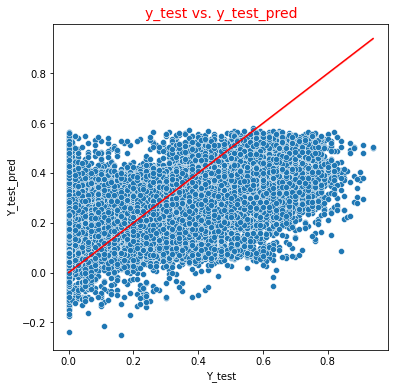

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()